# Interacting with CLIP

This is a self-contained notebook that shows how to download and run CLIP models, calculate the similarity between arbitrary image and text inputs, and perform zero-shot image classifications.

In [1]:
import os

def get_free_path(path):
  i = 0
  
  while os.path.exists(path):
      i += 1
      path = path + ("_%02d" % i)
  return path


# Parameters

In [4]:
ipfs_path = "/content/ipfs"

experiment_name = "pixtunes_3_drive_run"

experiment_path = f"{ipfs_path}/video_to_clip/{experiment_name}" #get_free_path(f"{ipfs_path}/video_to_clip/{experiment_name}")

results_path = f"{experiment_path}/results"

top_classes=7

# The words only take effect if cifar is False (otherwise the 100 CIFAR categories will be used)
cifar = False
#words = ["Happiness", "Excitement", "Boredom", "Sadness","Anger", "Disgust", "Fear"] 
#words = ["baby","bed","bicycle","bottle","bowl","boy","bridge","bus","can","castle","chair","clock","cloud","couch","cup","girl","house","keyboard","lamp","man","motorcycle","mountain","pickup_truck","plate","road","rocket","skyscraper","streetcar","table","tank","telephone","television","tractor","train","wardrobe","woman"]
#words = ["compassion","friendship","dreams","bittersweet","calm","relaxing","heroic","energizing","romantic","love","transcendental","mystical","awe-inspiring","eerie","mysterious","joyful","erotic","euphoric","ecstatic","defiant","proud","strong","sad","depressing","tender", "magical", "energetic"]
words = ["shows compassion","shows friendship","is dreamy","is calm","is relaxing","shows courage", "is energetic","shows romance","shows love","is transcendental","is mystical","is awe-inspring","is eerie","is joyful","depicts confusion","is euphoric","is ecstatic","shows defiance","shows pride","shows strength","is sad","shows sadness","shows depression","is depressing", "is magical", "shows movement","shows tenderness"]
print("Experiment Path:",experiment_path)

Experiment Path: /content/ipfs/video_to_clip/pixtunes_3_drive_run


In [ ]:
print("_%02d" % 2)
!pip install youtube-dl
!youtube-dl https://www.youtube.com/watch?v=4hQh3G1dVpk --output $experiment_path/heaven
!mkdir -p $experiment_path/frames
!ffmpeg -i $experiment_path/heaven.mkv -y -vf "crop=in_h*1/1:in_h,scale=-2:512,fps=15" $experiment_path/frames/frame_%04d.png
#ffmpeg -i SomeInput.mp4 -t 4 SomeOutput.mp4

In [28]:
!mkdir -p $experiment_path/frames
!ffmpeg -i /content/ipfs/video_to_clip/pixtunes_1/pixtunes_sports_together.mp4 -y -vf "crop=in_h*1/1:in_h,scale=-2:512,fps=15" $experiment_path/frames/frame_%04d.png



ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

# Preparation for Colab


Make sure you're running a GPU runtime; if not, select "GPU" as the hardware accelerator in Runtime > Change Runtime Type in the menu. The next cells will print the CUDA version of the runtime if it has a GPU, and install PyTorch 1.7.1.

In [3]:
!mkdir -p $results_path
%cd /content
!git clone https://github.com/voodoohop/pollinations.git
%cd /content/pollinations/app
!git pull
!git checkout dev
!git pull
!npm install
!npm install -g
%cd -
#!npm install forever -g

/content
Cloning into 'pollinations'...
remote: Enumerating objects: 1639, done.
remote: Counting objects: 100% (852/852), done.
remote: Compressing objects: 100% (624/624), done.
remote: Total 1639 (delta 587), reused 364 (delta 195), pack-reused 787
Receiving objects: 100% (1639/1639), 12.31 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (1042/1042), done.
/content/pollinations/app
Already up to date.
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
Already up to date.
npm WARN deprecated core-js@2.6.12: core-js@<3.3 is no longer maintained and not recommended for usage due to the number of issues. Because of the V8 engine whims, feature detection in old core-js versions could cause a slowdown up to 100x even if nothing is polyfilled. Please, upgrade your dependencies to the actual version of core-js.
npm WARN deprecated babel-eslint@10.1.0: babel-eslint is now @babel/eslint-parser. This package will no longer receive updates.
npm WARN d

In [12]:
IPFS_ROOT = "/content/ipfs"
DATA_PATH = experiment_path+"/frames"
!echo "Num input images:" `ls -l {DATA_PATH}/*.jpg {DATA_PATH}/*.png 2>/dev/null | wc -l`

Num input images: 0


DISABLED


```
!apt-get install imagemagick
from glob import glob
from tqdm import tqdm_notebook
for file in tqdm_notebook(glob(DATA_PATH+"/*.png")):
  #print(file)
  !mogrify -resize 512 $file 
```



In [13]:
#!DEBUG=* pollinate -p $IPFS_ROOT -s --once --ipns
#print(IPFS_ROOT)
!echo /ipns/pollinations.ai | DEBUG=* pollinate -p $IPFS_ROOT  -r --once


Streaming output truncated to the last 5000 lines.
      'frame_0165.png': '-r/tiergarten/frames_8fps/frame_0165.png',
      'frame_0166.png': '-r/tiergarten/frames_8fps/frame_0166.png',
      'frame_0167.png': '-r/tiergarten/frames_8fps/frame_0167.png',
      'frame_0168.png': '-r/tiergarten/frames_8fps/frame_0168.png',
      'frame_0169.png': '-r/tiergarten/frames_8fps/frame_0169.png',
      'frame_0170.png': '-r/tiergarten/frames_8fps/frame_0170.png',
      'frame_0171.png': '-r/tiergarten/frames_8fps/frame_0171.png',
      'frame_0172.png': '-r/tiergarten/frames_8fps/frame_0172.png',
      'frame_0173.png': '-r/tiergarten/frames_8fps/frame_0173.png',
      'frame_0174.png': '-r/tiergarten/frames_8fps/frame_0174.png',
      'frame_0175.png': '-r/tiergarten/frames_8fps/frame_0175.png',
      'frame_0176.png': '-r/tiergarten/frames_8fps/frame_0176.png',
      'frame_0177.png': '-r/tiergarten/frames_8fps/frame_0177.png',
      'frame_0178.png': '-r/tiergarten/frames_8fps/frame_0178.png

In [ ]:
#!mkdir -p /content/ipfs/tiergarten/frames_8fps/valence_ourasl
#!ffmpeg -i /content/ipfs/tiergarten-long.mp4 -r 8 /content/ipfs/tiergarten/frames_8fps/frame_%04d.png

In [ ]:
#!ffmpeg -i "/content/ipfs/tiergarten/frames_8fps/"%*.png /content/valenceArousel.mp4


In [14]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

CUDA version: 11.0


In [15]:
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex tqdm

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.3MB/s eta 0:04:12tcmalloc: large alloc 1147494400 bytes == 0x559beaf8a000 @  0x7f964dd83615 0x559bb245bcdc 0x559bb253b52a 0x559bb245eafd 0x559bb254ffed 0x559bb24d2988 0x559bb24cd4ae 0x559bb24603ea 0x559bb24d27f0 0x559bb24cd4ae 0x559bb24603ea 0x559bb24cf32a 0x559bb2550e36 0x559bb24ce853 0x559bb2550e36 0x559bb24ce853 0x559bb2550e36 0x559bb24ce853 0x559bb2550e36 0x559bb25d33e1 0x559bb25336a9 0x559bb249ecc4 0x559bb245f559 0x559bb24d34f8 0x559bb246030a 0x559bb24ce3b5 0x559bb24cd7ad 0x559bb24603ea 0x559bb24ce3b5 0x559bb246030a 0x559bb24ce3b5
     |█████████████████████████████▏  | 1055.7MB 1.2MB/s eta 0:01:28tcmalloc: large alloc 1434370048 bytes == 0x559c2f5e0000 @  0x7f964dd83615 0x559bb245bcdc 0x559bb253b52a 0x559bb245eafd 0x559bb254ffed 0x559bb24d2988 0x559bb24cd4ae 0x559bb24603ea 0x559bb24d27f0 0x559bb24cd4ae 0x559bb24603ea 0x559bb24cf32a 0x559bb2550e36 0x559bb24ce853 0

In [16]:
import numpy as np
import torch

print("Torch version:", torch.__version__)

Torch version: 1.7.1+cu110


# Downloading the model

CLIP models are distributed as TorchScript modules.

In [17]:
MODELS = {
    "RN50": "https://openaipublic.azureedge.net/clip/models/afeb0e10f9e5a86da6080e35cf09123aca3b358a0c3e3b6c78a7b63bc04b6762/RN50.pt",
    "RN101": "https://openaipublic.azureedge.net/clip/models/8fa8567bab74a42d41c5915025a8e4538c3bdbe8804a470a72f30b0d94fab599/RN101.pt",
    "RN50x4": "https://openaipublic.azureedge.net/clip/models/7e526bd135e493cef0776de27d5f42653e6b4c8bf9e0f653bb11773263205fdd/RN50x4.pt",
    "ViT-B/32": "https://openaipublic.azureedge.net/clip/models/40d365715913c9da98579312b702a82c18be219cc2a73407c4526f58eba950af/ViT-B-32.pt",    
}

In [18]:
! wget {MODELS["ViT-B/32"]} -O model.pt

--2021-05-13 18:03:06--  https://openaipublic.azureedge.net/clip/models/40d365715913c9da98579312b702a82c18be219cc2a73407c4526f58eba950af/ViT-B-32.pt
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.253.67, 13.107.226.67, 2620:1ec:bdf::67, ...
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.253.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353976522 (338M) [application/octet-stream]
Saving to: ‘model.pt’

model.pt            100%[===================>] 337.58M  51.3MB/s    in 5.8s    

2021-05-13 18:03:12 (58.0 MB/s) - ‘model.pt’ saved [353976522/353976522]



In [19]:
model = torch.jit.load("model.pt").cuda().eval()
input_resolution = model.input_resolution.item()
context_length = model.context_length.item()
vocab_size = model.vocab_size.item()

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


# Image Preprocessing

We resize the input images and center-crop them to conform with the image resolution that the model expects. Before doing so, we will normalize the pixel intensity using the dataset mean and standard deviation.



In [20]:
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from PIL import Image

preprocess = Compose([
    Resize(input_resolution, interpolation=Image.BICUBIC),
    CenterCrop(input_resolution),
    ToTensor()
])

image_mean = torch.tensor([0.48145466, 0.4578275, 0.40821073]).cuda()
image_std = torch.tensor([0.26862954, 0.26130258, 0.27577711]).cuda()

# Text Preprocessing

We use a case-insensitive tokenizer. The tokenizer code is hidden in the second cell below

In [21]:
! pip install ftfy regex
! wget https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz -O bpe_simple_vocab_16e6.txt.gz

--2021-05-13 18:03:18--  https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.253.67, 13.107.226.67, 2620:1ec:29::67, ...
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.253.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1356917 (1.3M) [application/octet-stream]
Saving to: ‘bpe_simple_vocab_16e6.txt.gz’

bpe_simple_vocab_16 100%[===================>]   1.29M  --.-KB/s    in 0.09s   

2021-05-13 18:03:18 (14.7 MB/s) - ‘bpe_simple_vocab_16e6.txt.gz’ saved [1356917/1356917]



In [22]:
#@title

import gzip
import html
import os
from functools import lru_cache

import ftfy
import regex as re


@lru_cache()
def bytes_to_unicode():
    """
    Returns list of utf-8 byte and a corresponding list of unicode strings.
    The reversible bpe codes work on unicode strings.
    This means you need a large # of unicode characters in your vocab if you want to avoid UNKs.
    When you're at something like a 10B token dataset you end up needing around 5K for decent coverage.
    This is a signficant percentage of your normal, say, 32K bpe vocab.
    To avoid that, we want lookup tables between utf-8 bytes and unicode strings.
    And avoids mapping to whitespace/control characters the bpe code barfs on.
    """
    bs = list(range(ord("!"), ord("~")+1))+list(range(ord("¡"), ord("¬")+1))+list(range(ord("®"), ord("ÿ")+1))
    cs = bs[:]
    n = 0
    for b in range(2**8):
        if b not in bs:
            bs.append(b)
            cs.append(2**8+n)
            n += 1
    cs = [chr(n) for n in cs]
    return dict(zip(bs, cs))


def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def basic_clean(text):
    text = ftfy.fix_text(text)
    text = html.unescape(html.unescape(text))
    return text.strip()


def whitespace_clean(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


class SimpleTokenizer(object):
    def __init__(self, bpe_path: str = "bpe_simple_vocab_16e6.txt.gz"):
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v: k for k, v in self.byte_encoder.items()}
        merges = gzip.open(bpe_path).read().decode("utf-8").split('\n')
        merges = merges[1:49152-256-2+1]
        merges = [tuple(merge.split()) for merge in merges]
        vocab = list(bytes_to_unicode().values())
        vocab = vocab + [v+'</w>' for v in vocab]
        for merge in merges:
            vocab.append(''.join(merge))
        vocab.extend(['<|startoftext|>', '<|endoftext|>'])
        self.encoder = dict(zip(vocab, range(len(vocab))))
        self.decoder = {v: k for k, v in self.encoder.items()}
        self.bpe_ranks = dict(zip(merges, range(len(merges))))
        self.cache = {'<|startoftext|>': '<|startoftext|>', '<|endoftext|>': '<|endoftext|>'}
        self.pat = re.compile(r"""<\|startoftext\|>|<\|endoftext\|>|'s|'t|'re|'ve|'m|'ll|'d|[\p{L}]+|[\p{N}]|[^\s\p{L}\p{N}]+""", re.IGNORECASE)

    def bpe(self, token):
        if token in self.cache:
            return self.cache[token]
        word = tuple(token[:-1]) + ( token[-1] + '</w>',)
        pairs = get_pairs(word)

        if not pairs:
            return token+'</w>'

        while True:
            bigram = min(pairs, key = lambda pair: self.bpe_ranks.get(pair, float('inf')))
            if bigram not in self.bpe_ranks:
                break
            first, second = bigram
            new_word = []
            i = 0
            while i < len(word):
                try:
                    j = word.index(first, i)
                    new_word.extend(word[i:j])
                    i = j
                except:
                    new_word.extend(word[i:])
                    break

                if word[i] == first and i < len(word)-1 and word[i+1] == second:
                    new_word.append(first+second)
                    i += 2
                else:
                    new_word.append(word[i])
                    i += 1
            new_word = tuple(new_word)
            word = new_word
            if len(word) == 1:
                break
            else:
                pairs = get_pairs(word)
        word = ' '.join(word)
        self.cache[token] = word
        return word

    def encode(self, text):
        bpe_tokens = []
        text = whitespace_clean(basic_clean(text)).lower()
        for token in re.findall(self.pat, text):
            token = ''.join(self.byte_encoder[b] for b in token.encode('utf-8'))
            bpe_tokens.extend(self.encoder[bpe_token] for bpe_token in self.bpe(token).split(' '))
        return bpe_tokens

    def decode(self, tokens):
        text = ''.join([self.decoder[token] for token in tokens])
        text = bytearray([self.byte_decoder[c] for c in text]).decode('utf-8', errors="replace").replace('</w>', ' ')
        return text


# Setting up input images and texts

We are going to feed 8 example images and their textual descriptions to the model, and compare the similarity between the corresponding features.

The tokenizer is case-insensitive, and we can freely give any suitable textual descriptions.

In [23]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [27]:
print(experiment_path)

/content/ipfs/video_to_clip/pixtunes_3_drive_run


Preprocessing images... 1651


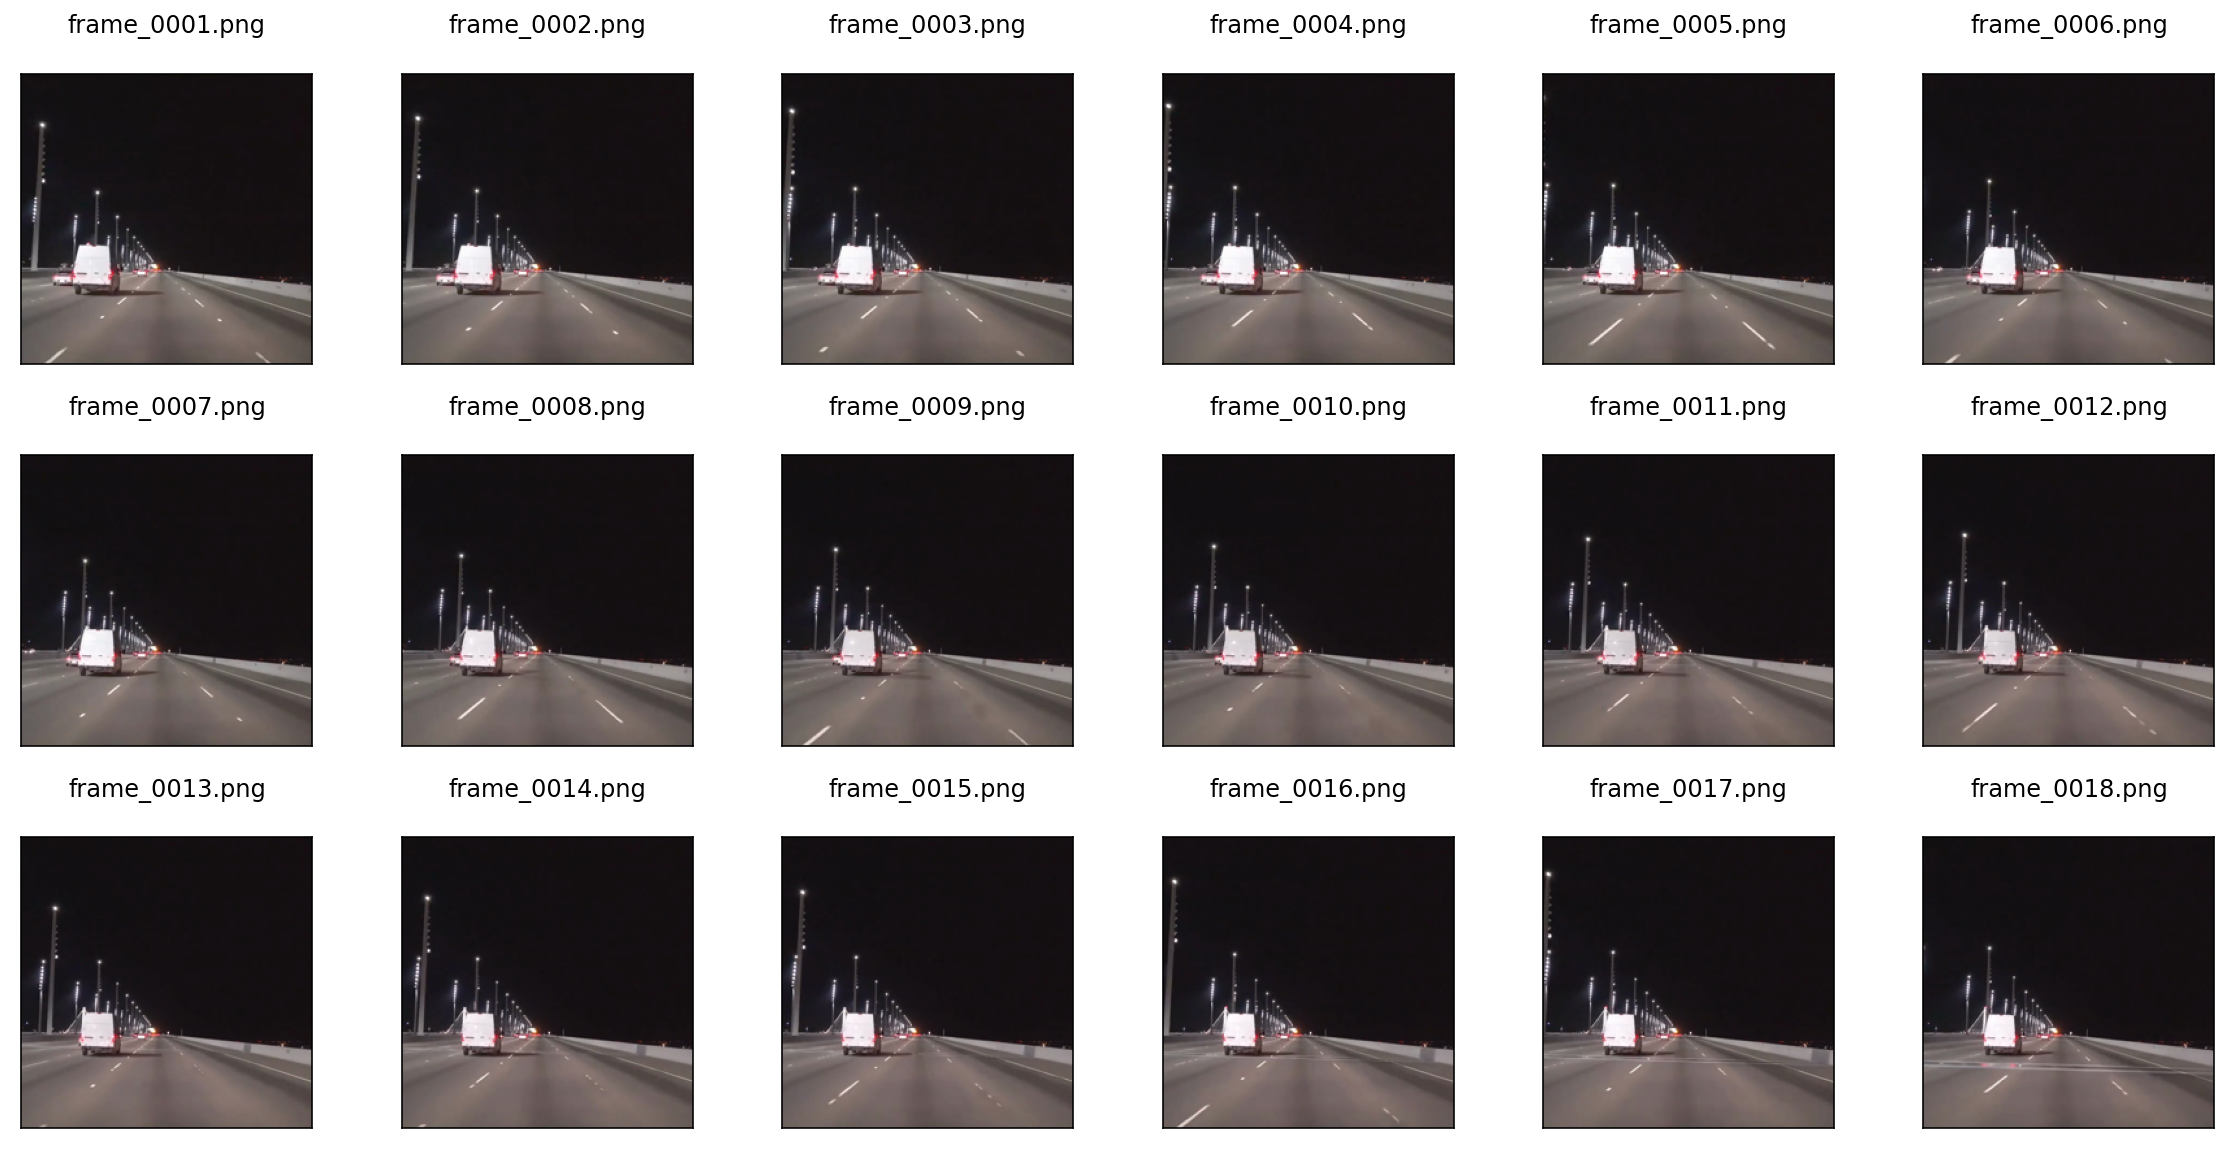

In [29]:

from tqdm.notebook import tqdm_notebook
images = []
#texts = [
plt.figure(figsize=(16, 16))
images_path = experiment_path+"/frames"

filenames = os.listdir(images_path)
filenames.sort()
cols = 6
filenames = [filename for filename in filenames if filename.endswith(".png") or filename.endswith(".jpg")]
print("Preprocessing images...", len(filenames))
for filename in tqdm_notebook(filenames):
    i = len(images)
    #prop = i / len(images)
    name = os.path.splitext(filename)[0]

    try :
      image = preprocess(Image.open(os.path.join(images_path, filename)).convert("RGB"))
      images.append(image)
    
      #if i < cols*cols:
        
      #print(name)
      if i<cols*cols // 2:
        plt.subplot(6, 6, i+1)
        plt.imshow(image.permute(1, 2, 0))
        plt.title(f"{filename}\n")
        plt.xticks([])
        plt.yticks([])

        plt.tight_layout()
      
    except :
      print("Error reading image", name, "Deleting")
      !rm -v $filename

## Building features

We normalize the images, tokenize each text input, and run the forward pass of the model to get the image and text features.



*   List item
*   List item



In [30]:
if cifar:
  from torchvision.datasets import CIFAR100
  words = CIFAR100(os.path.expanduser("~/.cache"), transform=preprocess, download=True).classes

text_descriptions = [f"This photo shows {label.lower()}" for label in words]

print("\n".join(text_descriptions))

This photo shows shows compassion
This photo shows shows friendship
This photo shows is dreamy
This photo shows is calm
This photo shows is relaxing
This photo shows shows courage
This photo shows is energetic
This photo shows shows romance
This photo shows shows love
This photo shows is transcendental
This photo shows is mystical
This photo shows is awe-inspring
This photo shows is eerie
This photo shows is joyful
This photo shows depicts confusion
This photo shows is euphoric
This photo shows is ecstatic
This photo shows shows defiance
This photo shows shows pride
This photo shows shows strength
This photo shows is sad
This photo shows shows sadness
This photo shows shows depression
This photo shows is depressing
This photo shows is magical
This photo shows shows movement
This photo shows shows tenderness


In [31]:
image_input = torch.tensor(np.stack(images)).cuda()
image_input -= image_mean[:, None, None]
image_input /= image_std[:, None, None]

In [32]:
tokenizer = SimpleTokenizer()
text_tokens = [tokenizer.encode(desc) for desc in text_descriptions]

In [33]:
text_input = torch.zeros(len(text_tokens), model.context_length, dtype=torch.long)
sot_token = tokenizer.encoder['<|startoftext|>']
eot_token = tokenizer.encoder['<|endoftext|>']

for i, tokens in enumerate(text_tokens):
    tokens = [sot_token] + tokens + [eot_token]
    text_input[i, :len(tokens)] = torch.tensor(tokens)

text_input = text_input.cuda()

In [34]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    #text_features = model.encode_text(text_input).float()

## Calculating cosine similarity

We normalize the features and calculate the dot product of each pair.

# Zero-Shot Image Classification

You can classify images using the cosine similarity (times 100) as the logits to the softmax operation.

In [35]:
def get_probs(text_input):
  with torch.no_grad():
      text_features = model.encode_text(text_input).float()
      text_features /= text_features.norm(dim=-1, keepdim=True)

  text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
  return text_probs
  
text_probs = get_probs(text_input)

In [36]:
from scipy import ndimage

def moving_average(x, w):
    return ndimage.convolve(x, np.ones((w,1))) / w

def smooth_text_probs(text_probs):
  text_probs_cpu = text_probs
  #print(moving_average(text_probs_cpu,5).shape)

  text_probs_smoothed = moving_average(text_probs,75)
  # a Gaussian filter with a standard deviation of 10
  #gauss = ndimage.gaussian_filter1d(img, 10, 1)
  #text_probs_smoothed[0].shape

  return text_probs_smoothed

# mean over whole sequence
#_, top_labels = torch.from_numpy(text_probs.cpu().numpy().mean(0)).cpu().topk(top_classes, dim=-1,sorted=False)
# top_probs = text_probs[:,top_labels].cpu().numpy()

# per frame
text_probs = smooth_text_probs(text_probs.cpu())
top_probs, top_labels = torch.from_numpy(text_probs).cpu().topk(top_classes, dim=-1,sorted=True)


In [37]:
#top_probs = (top_probs / 2) + ((top_probs.cpu().numpy() / np.amax(top_probs.cpu().numpy(), axis=0))/2)



In [38]:

top_probs.shape, top_labels.shape

(torch.Size([1651, 7]), torch.Size([1651, 7]))

In [39]:

#top_probs, top_labels = text_probs_top.cpu().topk(top_classes, dim=-1,sorted=False)
#top_probs = smooth_text_probs(top_probs)


<Figure size 432x288 with 0 Axes>

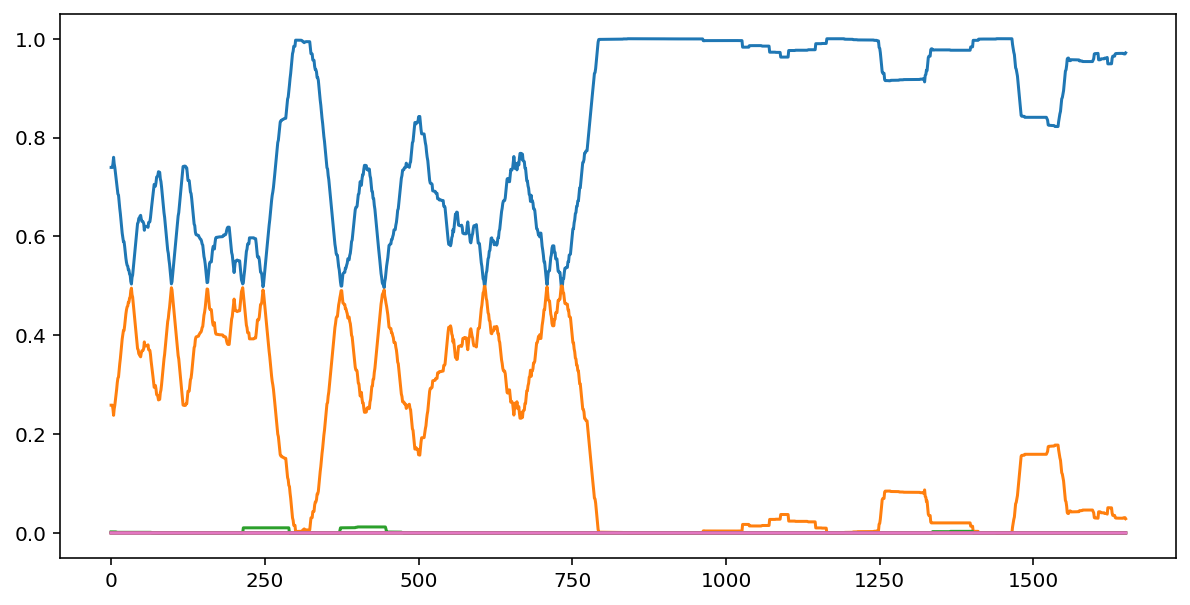

In [40]:

#resort_indices = np.argsort(top_labels.cpu().numpy())
#top_labels_sorted = np.take_along_axis(top_labels, resort_indices,axis=1)
#top_probs_sorted = np.take_along_axis(top_probs, resort_indices,axis=1)

plt.clf()
plt.figure(figsize=(10,5))
plt.plot(top_probs[:,:10])
#plt.plot(text_probs_smoothed[:,:4])
plt.show()
#print(results_path)
#print(top_labels[:100,:5])


In [ ]:

from IPython.display import clear_output
from tqdm.notebook import tqdm

print(len(images))
image_no = 0

plt.style.use('dark_background')
#!rm -rv $results_path
!mkdir -p $results_path
#!mkdir -p /content/ipfs/tiergarten/frames_8fps/valence_arousal/
def plot_img(index):
  #clear_output()
  #plt.ioff()
  image = images[index]
  top_label = top_labels[index]
  top_prop = top_probs[index]
  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  img = image.permute(1, 2, 0)
  plt.imshow(img)
 
  plt.axis("off")
  plt.subplot(1, 2, 2)
  y = np.arange(top_probs.shape[-1])
  plt.grid()
  plt.xlim([0,1])
  plt.barh(y, top_probs[index])  
  plt.gca().invert_yaxis()
  plt.gca().set_axisbelow(True)
  plt.yticks(y, [words[index] for index in top_label.numpy()])
  plt.xlabel("probability")
 
  #plt.subplots_adjust(wspace=0.5)

  plt.tight_layout()
  plt.savefig(f"{results_path}/{experiment_name}_{'{:04}'.format(index)}.png")
  plt.close()
  #plt.show()
 

for i, image in enumerate(tqdm_notebook(images)):
    print("frame:",i)
    plot_img(i)
 
 
# plt.subplots_adjust(wspace=0.5)
# plt.show()

1651


frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48
frame: 49
frame: 50
frame: 51
frame: 52
frame: 53
frame: 54
frame: 55
frame: 56
frame: 57
frame: 58
frame: 59
frame: 60
frame: 61
frame: 62
frame: 63
frame: 64
frame: 65
frame: 66
frame: 67
frame: 68
frame: 69
frame: 70
frame: 71
frame: 72
frame: 73
frame: 74
frame: 75
frame: 76
frame: 77
frame: 78
frame: 79
frame: 80
frame: 81
frame: 82
frame: 83
frame: 84
frame: 85
frame: 86
frame: 87
frame: 88
frame: 89
frame: 90
frame: 91
frame: 92
frame: 93
frame: 94
frame: 95
frame: 96
frame: 97
frame: 98
frame: 99
frame: 100

In [42]:
video_path = results_path+"/"+experiment_name+".mp4"
print("video path",video_path)
!ffmpeg -i $results_path/%*.png  -vf format=yuv420p -r 15 -y $video_path
!mv $results_path/*.png /tmp
from google.colab import files
files.download(video_path) 


video path /content/ipfs/video_to_clip/pixtunes_3_drive_run/results/pixtunes_3_drive_run.mp4
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enabl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
blasdas

In [ ]:

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation


fps = 30
nSeconds = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')
